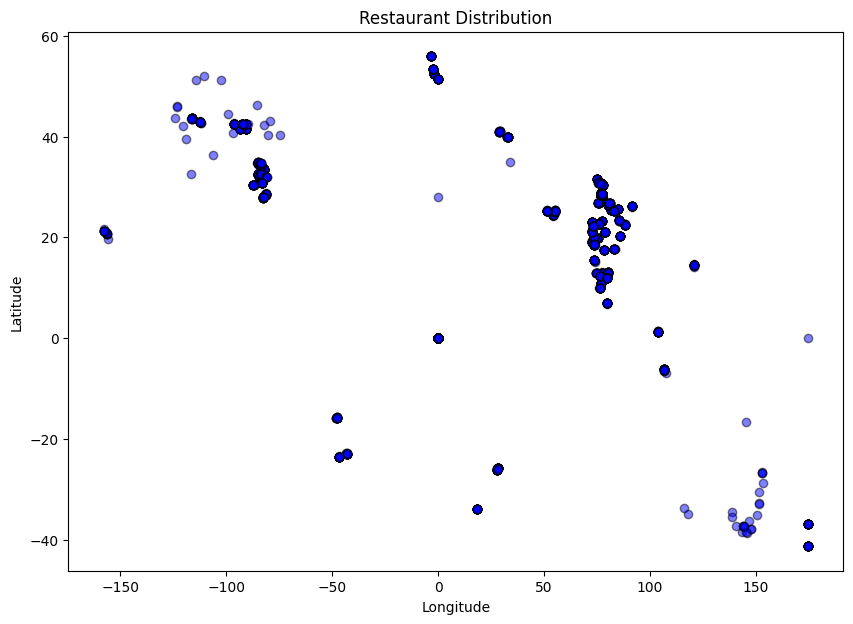

Interactive map saved as 'restaurants_map.html'.
Top 5 cities with the most restaurants:
City
New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
dtype: int64


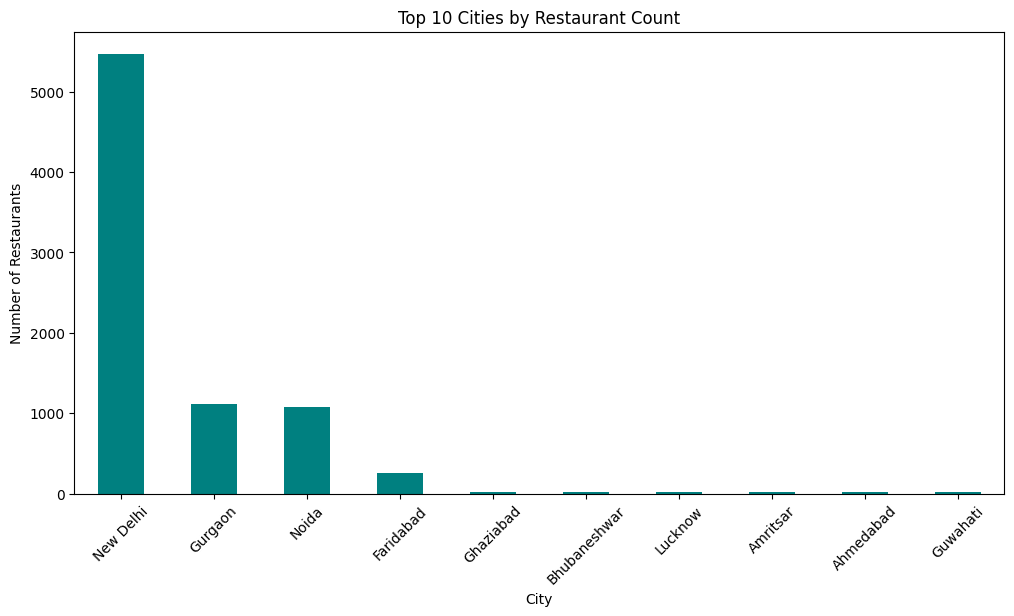


Insights:
The city with the most restaurants is New Delhi with 5473 restaurants.


In [ ]:
# Libraries and data reading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import geopandas as gpd

# dataset
df = pd.read_csv('/content/Dataset .csv')

# Ensure required columns are present
if "Latitude" in df.columns and "Longitude" in df.columns:
    ## Step 1: Visualize restaurant distribution using a scatter plot
    plt.figure(figsize=(10, 7))
    plt.scatter(df["Longitude"], df["Latitude"], alpha=0.5, c='blue', edgecolors='k')
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Restaurant Distribution")
    plt.show()

    ## Step 2: Convert to GeoDataFrame and visualize on a Folium map
    # Create a GeoDataFrame from the restaurant data
    restaurants_gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))
    restaurants_gdf.crs = 'EPSG:4326'  # Define the coordinate reference system

    # Create a map centered around the average location
    map_center = [restaurants_gdf.geometry.y.mean(), restaurants_gdf.geometry.x.mean()]
    map_restaurants = folium.Map(location=map_center, zoom_start=12)

    # Add points to the map
    for _, row in restaurants_gdf.iterrows():
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=f"Name: {row.get('Name', 'Unknown')}<br>Rating: {row.get('Rating', 'N/A')}",
        ).add_to(map_restaurants)

    # Display the map
    map_restaurants.save('restaurants_map.html')
    print("Interactive map saved as 'restaurants_map.html'.")

    ## Step 3: Group restaurants by city/locality and analyze concentrations
    if 'City' in df.columns:
        city_counts = df.groupby('City').size().sort_values(ascending=False)
        print("Top 5 cities with the most restaurants:")
        print(city_counts.head(5))

        # Visualize restaurant concentration by city
        plt.figure(figsize=(12, 6))
        city_counts.head(10).plot(kind='bar', color='teal')
        plt.title("Top 10 Cities by Restaurant Count")
        plt.xlabel("City")
        plt.ylabel("Number of Restaurants")
        plt.xticks(rotation=45)
        plt.show()

        ## Step 4: Calculate statistics such as average ratings and price ranges by city
        if 'Rating' in df.columns and 'Price Range' in df.columns:
            city_stats = df.groupby('City').agg({
                'Rating': 'mean',
                'Price Range': 'mean',
            }).sort_values(by='Rating', ascending=False)

            print("\nAverage Ratings and Price Ranges by City:")
            print(city_stats.head(10))

            # Visualize average ratings by city
            plt.figure(figsize=(12, 6))
            city_stats['Rating'].head(10).plot(kind='bar', color='orange')
            plt.title("Top 10 Cities by Average Ratings")
            plt.xlabel("City")
            plt.ylabel("Average Rating")
            plt.xticks(rotation=45)
            plt.show()

        ## Step 5: Identify patterns and insights
        print("\nInsights:")
        print(f"The city with the most restaurants is {city_counts.idxmax()} with {city_counts.max()} restaurants.")
        if 'Rating' in df.columns:
            print(f"The city with the highest average rating is {city_stats['Rating'].idxmax()} "
                  f"with an average rating of {city_stats['Rating'].max():.2f}.")
else:
    print("Latitude and Longitude columns not found in the dataset.")
